In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

from custom_model import LogisticRegressionScratch
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Cấu hình hiển thị biểu đồ ngay trong notebook
%matplotlib inline

# --- CẤU HÌNH ĐƯỜNG DẪN ---
# Lưu ý: Đảm bảo bạn đã chạy file preprocessing để có dữ liệu trong thư mục này
DATA_DIR = '../data/split_data'
MODEL_DIR = '../model'

# Tạo thư mục models nếu chưa có
os.makedirs(MODEL_DIR, exist_ok=True)

print(" Đã nhập thư viện và cấu hình đường dẫn.")

 Đã nhập thư viện và cấu hình đường dẫn.


In [2]:
print(" Đang tải dữ liệu...")

try:
    # Đọc dữ liệu từ file CSV
    X_train = pd.read_csv(f'{DATA_DIR}/X_train.csv')
    y_train = pd.read_csv(f'{DATA_DIR}/y_train.csv')
    X_val = pd.read_csv(f'{DATA_DIR}/X_val.csv')
    y_val = pd.read_csv(f'{DATA_DIR}/y_val.csv')
    
    print(f" Đã tải xong:")
    print(f"   - Tập Train: {X_train.shape} mẫu")
    print(f"   - Tập Val:   {X_val.shape} mẫu")
    
    # Hiển thị 5 dòng đầu của tập Train để kiểm tra
    display(X_train.head())

except FileNotFoundError:
    print(" Lỗi: Không tìm thấy file dữ liệu.")
    print(f"Vui lòng kiểm tra lại thư mục: {DATA_DIR}")
    print("Gợi ý: Hãy chạy notebook preprocessing.ipynb trước.")

 Đang tải dữ liệu...
 Đã tải xong:
   - Tập Train: (397, 30) mẫu
   - Tập Val:   (86, 30) mẫu


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,2.664822,1.158961,2.600377,3.106075,0.750064,0.454059,1.782814,2.375132,-0.053372,-1.096887,...,2.982156,0.822813,2.833789,3.560506,0.838642,0.086101,1.006096,1.435773,-0.497881,-0.363850
1,1.460602,1.670916,1.480004,1.442275,-0.167259,1.280343,0.965486,0.696717,0.151081,-0.026596,...,1.631978,0.850497,1.612569,1.639107,0.812341,2.574680,1.616341,0.972885,1.247704,1.571270
2,0.208100,0.912292,0.347273,0.046959,0.572150,1.774977,1.015706,1.028170,-0.272428,0.556040,...,-0.039178,0.342424,0.337735,-0.168554,-0.033692,1.339296,0.895753,0.884571,0.160555,0.169804
3,0.034851,0.565559,0.068416,-0.062255,0.133059,0.103456,0.541128,0.182128,0.267911,-0.219390,...,-0.078524,0.762561,0.266249,-0.142361,0.536175,1.078479,1.182165,0.458226,1.116664,0.967238
4,0.352947,0.807574,0.339035,0.208504,-0.310301,-0.014043,0.293795,0.668344,-0.345447,-0.259083,...,0.033301,0.026507,0.007112,-0.087339,-0.292324,-0.347110,0.059545,0.502383,-0.557739,-0.868134


Giải thích:

Chúng ta tải X (đặc trưng) và y (nhãn) riêng biệt cho cả tập Train và Validation.

display() giúp xem trước dữ liệu để đảm bảo nó đã được chuẩn hóa (các số nhỏ, xoay quanh 0).

In [3]:
print(" Đang huấn luyện mô hình tự code...")

# Khởi tạo mô hình với learning rate và số vòng lặp
# Vì code tay không tối ưu bằng Sklearn, nên cần learning_rate nhỏ và n_iter lớn
custom_model = LogisticRegressionScratch(learning_rate=0.1, n_iterations=2000)

# Train mô hình (Hàm .values.ravel() để chuyển y về dạng mảng 1 chiều)
custom_model.fit(X_train, y_train.values.ravel())

print(" Đã huấn luyện xong!")
print(f"Trọng số (Weights) học được: {custom_model.weights[:5]}...") # Xem thử vài trọng số
print(f"Hệ số bias học được: {custom_model.bias}")

 Đang huấn luyện mô hình tự code...
Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.1103
Epoch 200, Loss: 0.0926
Epoch 300, Loss: 0.0850
Epoch 400, Loss: 0.0805
Epoch 500, Loss: 0.0774
Epoch 600, Loss: 0.0750
Epoch 700, Loss: 0.0732
Epoch 800, Loss: 0.0717
Epoch 900, Loss: 0.0704
Epoch 1000, Loss: 0.0693
Epoch 1100, Loss: 0.0684
Epoch 1200, Loss: 0.0675
Epoch 1300, Loss: 0.0667
Epoch 1400, Loss: 0.0660
Epoch 1500, Loss: 0.0654
Epoch 1600, Loss: 0.0648
Epoch 1700, Loss: 0.0642
Epoch 1800, Loss: 0.0637
Epoch 1900, Loss: 0.0632
 Đã huấn luyện xong!
Trọng số (Weights) học được: [0.44222921 0.68136545 0.41962422 0.51313263 0.24251949]...
Hệ số bias học được: -0.3596924857666909


Chúng ta sử dụng thuật toán Logistic Regression. Đây là thuật toán cơ bản nhưng rất hiệu quả cho bài toán phân loại nhị phân (2 lớp: Lành tính/Ác tính).


 📈 Đang vẽ biểu đồ quá trình học...


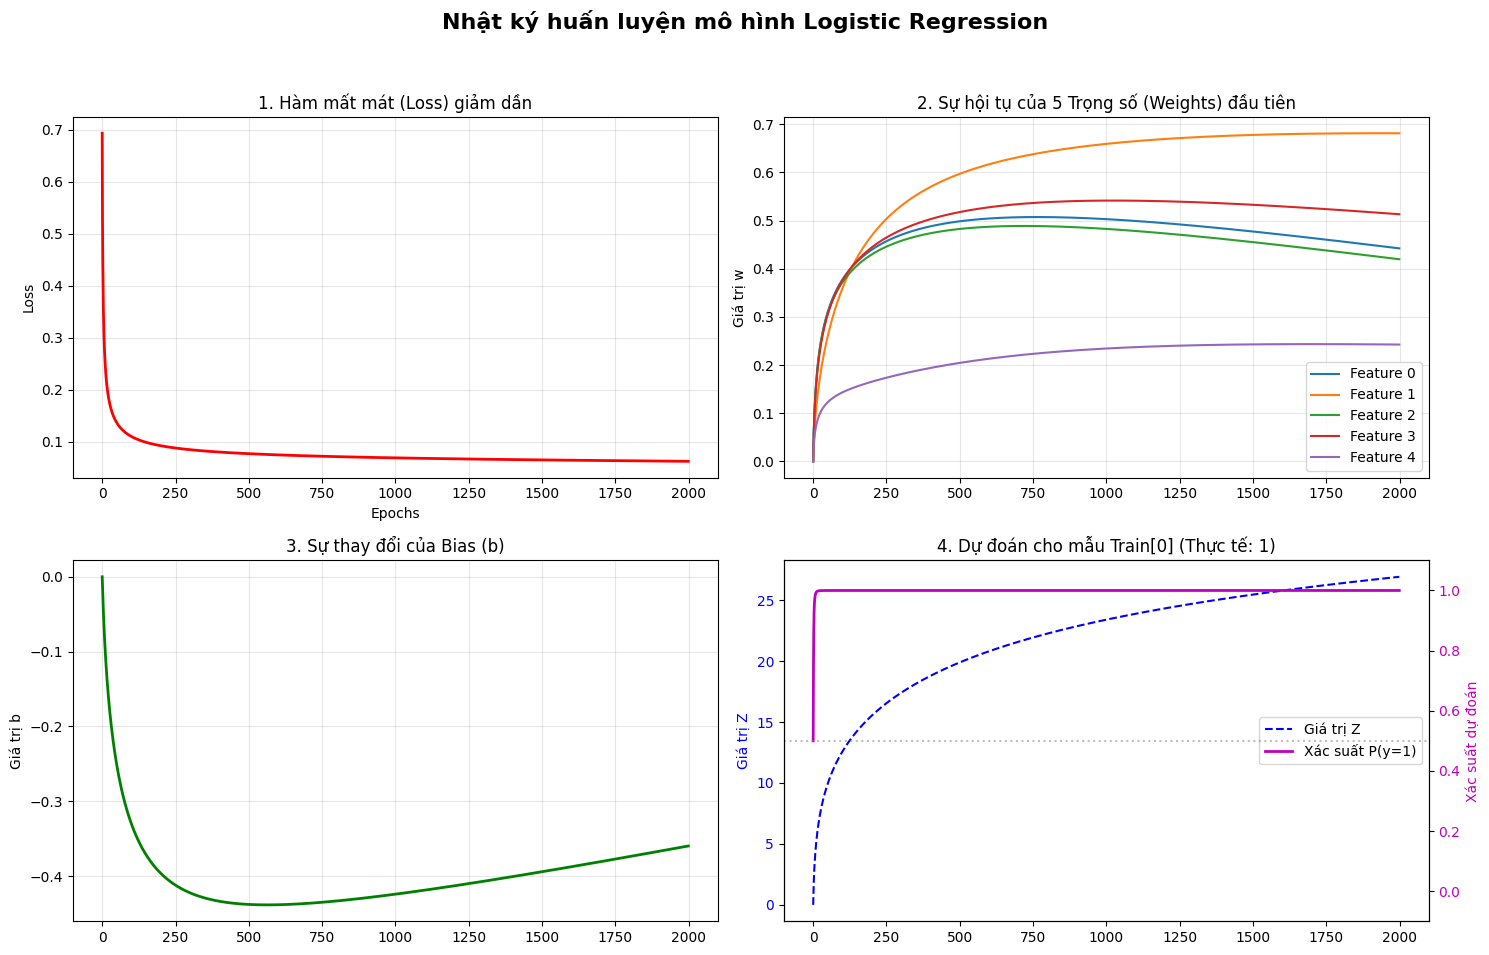

In [4]:
print("\n 📈 Đang vẽ biểu đồ quá trình học...")

# Lấy dữ liệu lịch sử từ model
history = custom_model.history
iterations = range(custom_model.n_iterations)

# Tạo khung hình lớn (Figure) chứa 4 biểu đồ con (Subplots)
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Nhật ký huấn luyện mô hình Logistic Regression', fontsize=16, fontweight='bold')

# --- 1. Biểu đồ Loss (Hàm mất mát) ---
# Mục tiêu: Đường này phải có xu hướng giảm dần và đi ngang (hội tụ)
axs[0, 0].plot(iterations, history['loss'], 'r', linewidth=2)
axs[0, 0].set_title('1. Hàm mất mát (Loss) giảm dần')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].grid(True, alpha=0.3)

# --- 2. Biểu đồ Weights (Trọng số) ---
# Mục tiêu: Xem các trọng số thay đổi từ 0 đến giá trị tối ưu
w_history = np.array(history['w'])
# Chỉ vẽ tối đa 5 đặc trưng đầu tiên để biểu đồ không bị rối
num_features_to_plot = min(5, w_history.shape[1]) 

for i in range(num_features_to_plot):
    axs[0, 1].plot(iterations, w_history[:, i], label=f'Feature {i}')
    
axs[0, 1].set_title(f'2. Sự hội tụ của {num_features_to_plot} Trọng số (Weights) đầu tiên')
axs[0, 1].set_ylabel('Giá trị w')
axs[0, 1].legend()
axs[0, 1].grid(True, alpha=0.3)

# --- 3. Biểu đồ Bias (Hệ số tự do) ---
axs[1, 0].plot(iterations, history['b'], 'g', linewidth=2)
axs[1, 0].set_title('3. Sự thay đổi của Bias (b)')
axs[1, 0].set_ylabel('Giá trị b')
axs[1, 0].grid(True, alpha=0.3)

# --- 4. Biểu đồ chi tiết cho mẫu dữ liệu đầu tiên (Sample 0) ---
# Mục tiêu: Hiểu mối quan hệ giữa Linear Output (z) và Xác suất (sigmoid)
ax4 = axs[1, 1]
# Lấy nhãn thực tế để đối chiếu
sample_label = y_train.values.ravel()[0] 
ax4.set_title(f'4. Dự đoán cho mẫu Train[0] (Thực tế: {sample_label})')

# Trục trái: Giá trị tuyến tính z (đường nét đứt màu xanh)
line1, = ax4.plot(iterations, history['z_sample'], 'b--', label='Linear Z')
ax4.set_ylabel('Giá trị Z', color='b')
ax4.tick_params(axis='y', labelcolor='b')

# Trục phải: Xác suất dự đoán (đường liền màu tím)
ax4_right = ax4.twinx()
line2, = ax4_right.plot(iterations, history['y_hat_sample'], 'm', linewidth=2, label='Xác suất (Sigmoid)')
ax4_right.set_ylabel('Xác suất dự đoán', color='m')
ax4_right.tick_params(axis='y', labelcolor='m')
ax4_right.set_ylim(-0.1, 1.1) # Giới hạn trục xác suất từ 0 đến 1
ax4_right.axhline(0.5, color='gray', linestyle=':', alpha=0.5) # Đường ngưỡng 0.5

# Tạo chú thích chung (Legend)
ax4.legend([line1, line2], ['Giá trị Z', 'Xác suất P(y=1)'], loc='center right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

 Sử dụng matplotlib để vẽ 4 biểu đồ quan trọng giúp đánh giá hiệu quả của thuật toán Gradient Descent:  
 Loss: Để kiểm tra xem mô hình có thực sự "học" (giảm sai số) hay không.  
 Weights: Sự hội tụ của các trọng số.  
 Bias: Sự thay đổi của hệ số tự do.  
 Sample Prediction: Theo dõi cách mô hình thay đổi quyết định đối với một mẫu dữ liệu cụ thể (quan hệ giữa z và xác suất y mũ).

In [5]:
print("\n Đánh giá trên tập Validation:")

# Dự đoán
y_pred_custom = custom_model.predict(X_val)

# Tính độ chính xác
acc = accuracy_score(y_val, y_pred_custom)
print(f" Độ chính xác (Accuracy): {acc:.4f} ({acc*100:.2f}%)")

print("\n Báo cáo chi tiết:")
print(classification_report(y_val, y_pred_custom, target_names=['Lành tính', 'Ác tính']))


 Đánh giá trên tập Validation:
 Độ chính xác (Accuracy): 0.9767 (97.67%)

 Báo cáo chi tiết:
              precision    recall  f1-score   support

   Lành tính       0.98      0.98      0.98        54
     Ác tính       0.97      0.97      0.97        32

    accuracy                           0.98        86
   macro avg       0.98      0.98      0.98        86
weighted avg       0.98      0.98      0.98        86



Giải thích:

Precision (Độ chính xác dự báo): Trong các ca mô hình bảo là Ác tính, có bao nhiêu % là đúng?

Recall (Độ nhạy): Trong các ca thực tế là Ác tính, mô hình phát hiện được bao nhiêu %? (Chỉ số này cực kỳ quan trọng trong y tế).

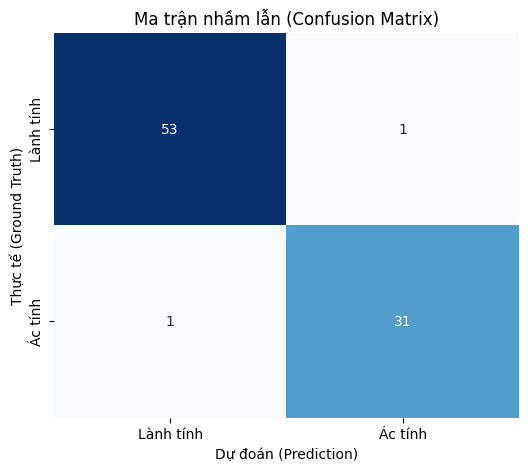

In [6]:
# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_val, y_pred_custom)

# Vẽ biểu đồ
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Lành tính', 'Ác tính'],
            yticklabels=['Lành tính', 'Ác tính'])

plt.title('Ma trận nhầm lẫn (Confusion Matrix)')
plt.ylabel('Thực tế (Ground Truth)')
plt.xlabel('Dự đoán (Prediction)')
plt.show()

Giải thích biểu đồ:

Các ô màu đậm trên đường chéo chính là số lượng dự đoán ĐÚNG.

Các ô còn lại là dự đoán SAI. Hãy chú ý ô góc dưới bên trái (Thực tế Ác tính nhưng đoán là Lành tính) - đây là sai lầm nguy hiểm nhất cần hạn chế.

In [7]:
# Đường dẫn lưu file
save_path = f'{MODEL_DIR}/logistic_model.pkl'

# Lưu mô hình
joblib.dump(custom_model, save_path)

print(f" Đã lưu mô hình thành công tại: {save_path}")
print("Bạn có thể sử dụng file này để dự đoán cho các dữ liệu mới.")

 Đã lưu mô hình thành công tại: ../model/logistic_model.pkl
Bạn có thể sử dụng file này để dự đoán cho các dữ liệu mới.


Cuối cùng, lưu mô hình đã huấn luyện ra file .pkl để sau này có thể dùng lại mà không cần train lại từ đầu.